## Predicting Employee Churn

* In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness. Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn. In some cases such as the employee with niche skills are harder to replace. It affects the ongoing work and productivity of existing employees. Acquiring new employees as a replacement has its costs such as hiring costs and training costs. Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee. Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

### Objective:

* Determine why employees are leaving the company, and learn to predict who will leave the company.

### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline

In [4]:
data=pd.read_csv('C:/Users/abc/Downloads/HR_comma_sep.csv')

In [26]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
data.shape

(14999, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

* As our dataset is highly biased towards class label 0 so we try to handle this data unbalancing problem through oversampling.

In [11]:
from sklearn.utils import resample
 
data_majority = data[data['left']==0]
data_minority = data[data['left']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=11428, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
data_upsampled['left'].value_counts()

1    11428
0    11428
Name: left, dtype: int64

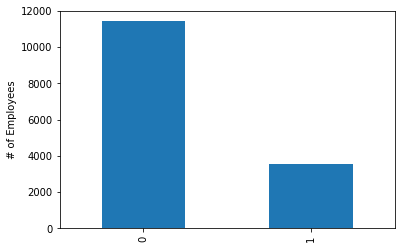

In [18]:
data['left'].value_counts().plot.bar()
plt.ylabel('# of Employees')
plt.show()

* Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

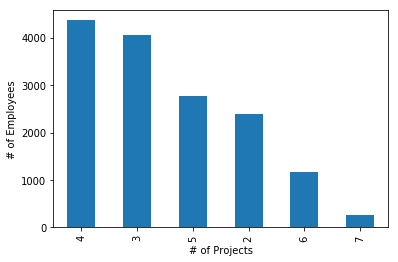

In [19]:
data['number_project'].value_counts().plot.bar()
plt.ylabel('# of Employees')
plt.xlabel('# of Projects')
plt.show()

* Most of the employee is doing the project from 3-4

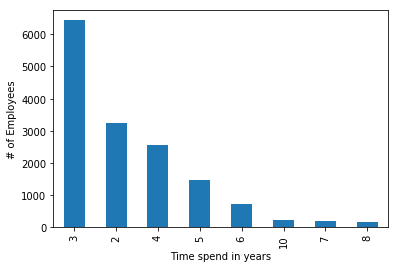

In [20]:
data['time_spend_company'].value_counts().plot.bar()
plt.ylabel('# of Employees')
plt.xlabel('Time spend in years')
plt.show()

* Most of the employee experience between 2-4 years. 

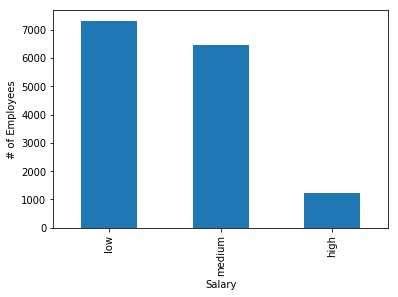

In [24]:
data['salary'].value_counts().plot.bar()
plt.ylabel('# of Employees')
plt.xlabel('Salary')
plt.show()

* Most of the employees are of low or medium salary.

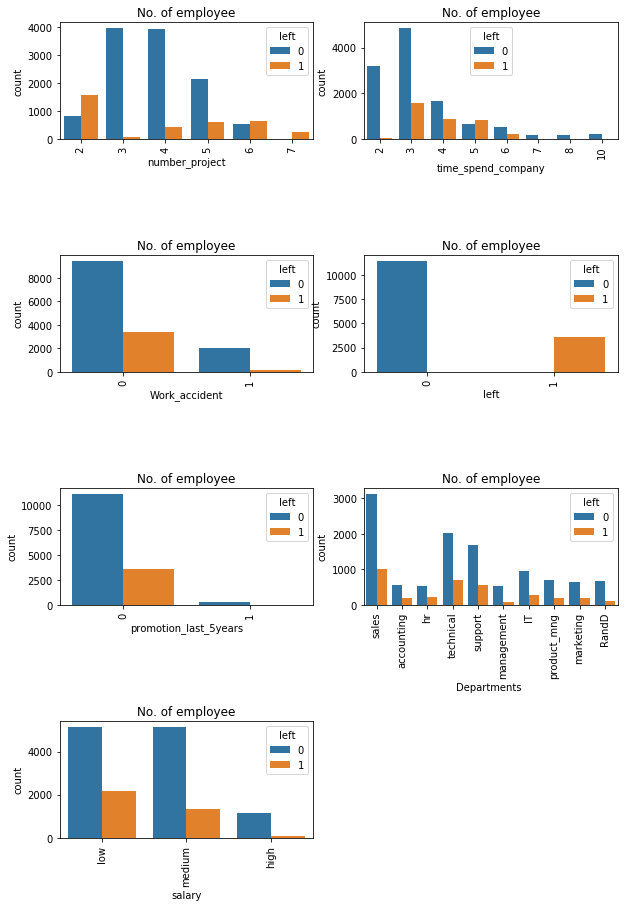

In [28]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

* Those employees who have the number of projects more than 5 were left the company.
* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

### Cluster Analysis

In [29]:
from sklearn.cluster import KMeans

left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

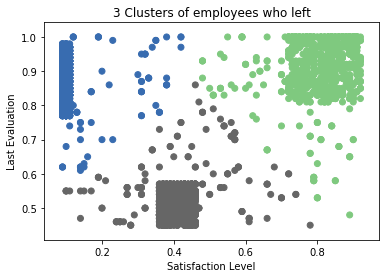

In [30]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

* High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

In [31]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

In [32]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [33]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

### Modelling using unbalanced data

In [34]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [36]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.971555555556
Precision: 0.958252427184
Recall: 0.920708955224


### Modelling using balanced data

In [42]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data_upsampled['salary']=le.fit_transform(data_upsampled['salary'])
data_upsampled['Departments ']=le.fit_transform(data_upsampled['Departments '])

In [43]:
X=data_upsampled[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data_upsampled['left']

In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

Text(0.5,15,'Predicted label')

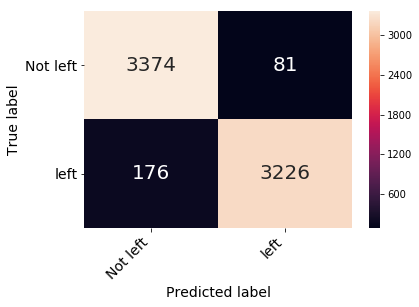

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('Not left', 'left'), ('Not left', 'left'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.962520052501
Precision: 0.975506501361
Recall: 0.948265726044


In [47]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["UnBalanced Data Modelling", "Balanced Data Modelling"]
x.add_row(["Accuracy: 0.971555555556", 'Accuracy: 0.962520052501'])
x.add_row(["Precision: 0.958252427184", 'Precision: 0.975506501361'])
x.add_row(["Recall: 0.920708955224", 'Recall: 0.948265726044'])
print(x)

+---------------------------+---------------------------+
| UnBalanced Data Modelling |  Balanced Data Modelling  |
+---------------------------+---------------------------+
|  Accuracy: 0.971555555556 |  Accuracy: 0.962520052501 |
| Precision: 0.958252427184 | Precision: 0.975506501361 |
|   Recall: 0.920708955224  |   Recall: 0.948265726044  |
+---------------------------+---------------------------+
